In [7]:
# Importing the necessary Packages.
import sys
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [8]:
# Import the classes from the unsupervised package
file_path = os.getcwd()
parent_path = Path(file_path)
parent_path = parent_path.parent.as_posix()
sys.path.append(str(parent_path +'/Unsupervised_model'))

from SVD import SVD as MySVD
from PCA import PCA as MyPCA
from TSNE import TSNE as MyTSNE

In [9]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

mnist.target = mnist.target.astype(int)

# Select only the images corresponding to 0s and 8s
X = mnist.data[(mnist.target == 0) | (mnist.target == 8)]
y = mnist.target[(mnist.target == 0) | (mnist.target == 8)]

X_scaled = StandardScaler().fit_transform(X)

c:\Users\Lina\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [10]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Apply dimensionality reduction using all your algorithms to train the model with only 2 features per
image**

In [11]:
# Apply my PCA with 2 components
pca = MyPCA(n_components=2)
X_pca_fit = pca.fit(X_train)
X_pca_transform = pca.fit_transform(X_train)
X_transformed = np.real(X_pca_transform)

c:\Users\Lina\anaconda3\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


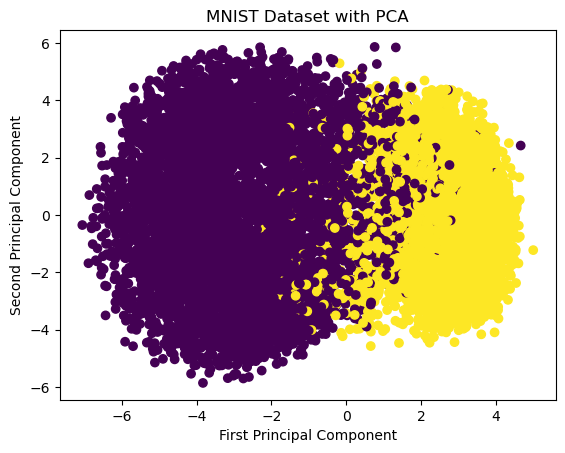

In [5]:
# Plot the 2 new features generated by PCA
plt.scatter(X_pca_transform[:, 0], X_pca_transform[:, 1], c=y_train)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('MNIST Dataset with PCA')
plt.show()

In [5]:
# Apply my SVD with 2 components
svd = MySVD(n_components=2)
X_svd_fit = svd.fit(X_train)
X_svd_transform = svd.fit_transform(X_train)

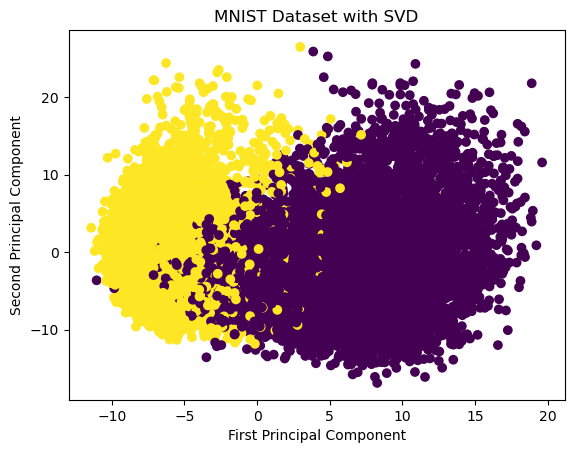

In [6]:
# Plot the 2 new features generated by SVD
plt.scatter(X_svd_transform[:, 0], X_svd_transform[:, 1], c=y_train)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('MNIST Dataset with SVD')
plt.show()

In [5]:
# Apply my TSNE with 2 components
tsne = MyTSNE(n_components=2)
X_tsne_fit = tsne.fit(X_train)
X_tsne_transform = tsne.transform(X_train)

100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100


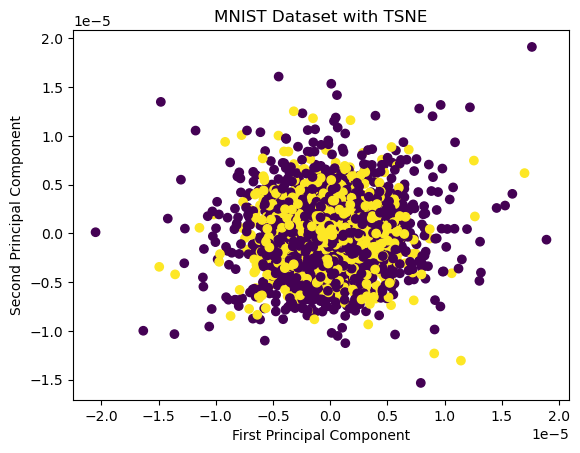

In [6]:
# Plot the 2 new features generated by TSNE
plt.scatter(X_tsne_transform[:, 0], X_tsne_transform[:, 1], c=y_train)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('MNIST Dataset with TSNE')
plt.show()

**Does this somehow impact the performance of your model?** 

Yes, the dimensionality reduction techniques such as PCA, SVD, and t-SNE can impact the performance of the model. When we reduce the dimensionality of the data, we lose some information, and this can lead to a loss of accuracy in the model

**Repeat the process above but now using the built-in algorithms in the Scikit-Learn library**

In [13]:
# Apply PCA to the data and reduce it to 2 features per image
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

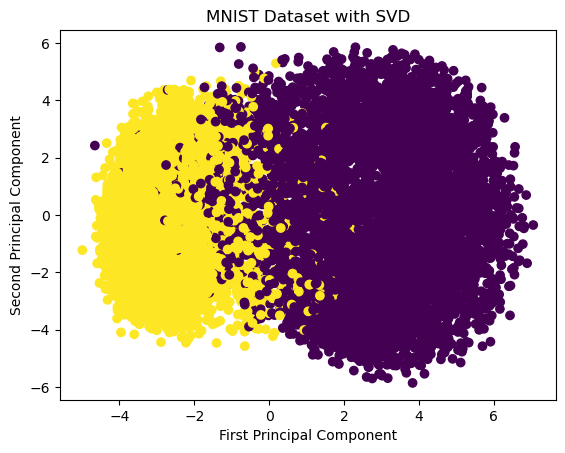

In [14]:
# Plot the 2 new features generated by PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('MNIST Dataset with PCA')
plt.show()

In [15]:
# Apply SVD to the data and reduce it to 2 features per image
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_train)

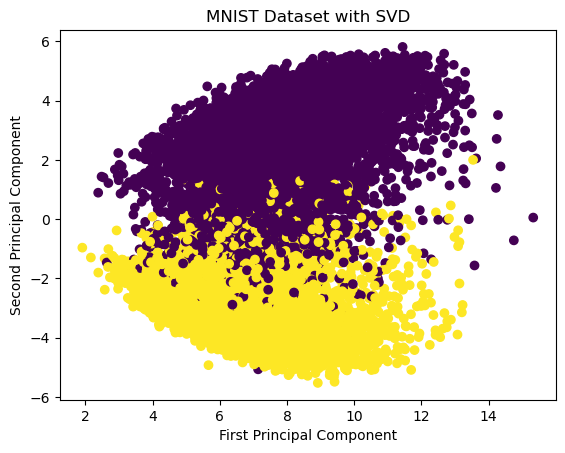

In [16]:
# Plot the 2 new features generated by SVD
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y_train)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('MNIST Dataset with SVD')
plt.show()

In [17]:
# Apply t-SNE to the data and reduce it to 2 features per image
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_train)

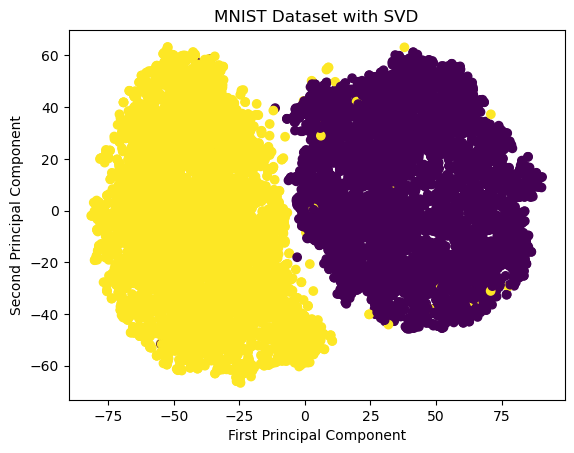

In [18]:
# Plot the 2 new features generated by SVD
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('MNIST Dataset with TSNE')
plt.show()

**How different are these results from those of your implementation? Why?**

In general terms, by having the same parameters between my implementation and the Scikit-Learn library models the results should be similar, but the Scikit-Learn library uses a higher numerical precision than what can be obtained in a manual implementation, given that it provides accurate and consistent results for a wide range of data sets, furthermore even small differences in the manual implementation of the model vs the scikit learn library models can lead to different results.
In this case, it is observed that the PCA does not present many differences visually, while the SVD does show a difference in the representation of the two components, like the TSNE, which presents a greater separation in the reduction of dimensionality.